In [53]:
import pandas as pd 
Data = pd.read_csv('train.csv')
Data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


The data has several features but we are only concerned about the followings:
Survived: A category of either 0 or 1 which indicates whether that individual survived.

Pclass: The ship was divided into three classes. First, Second, and Third.

Fare: The price that this individual paid for the ticket.

In [54]:
# Distribution for rich:
first_fares = Data["Fare"][Data["Pclass"]==1]
# Distribution for Poor
third_fares = Data["Fare"][Data["Pclass"]==3]

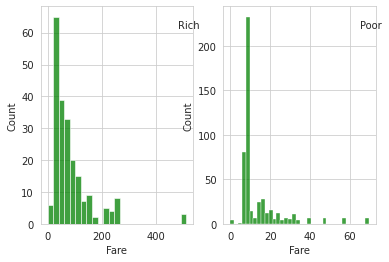

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import numpy as np 
f = plt.figure()
f.add_subplot(1,2,1)
ax1=sns.histplot(first_fares,color='g')
f.add_subplot(1,2,2)
ax2=sns.histplot(third_fares,color='g')
ax1.annotate('Rich',xy=(0.9, 0.9), xycoords="axes fraction")
ax2.annotate('Poor',xy=(0.9, 0.9), xycoords="axes fraction")

plt.show()

In [56]:
first_fares.describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [57]:
third_fares.describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

**Did the rich people have a better chance of survival?**

check the proportion of the people who survived from the first-class group and compare it to that of the third-class group 

The first-class tickets range between 12.72$ and 263$ with an average of 84.15$ while the third class tickets range between 6.88$ and 56.5$ with an average of 13.68$. So we can see that the class feature is a representation of the socio-economic status of the people in the ship and we can assume that those in the first-class group are the rich.

In statistical inference, hypothesis testing is used to check if the observed difference between the two populations is really significant or is just due to some randomness/bias in the data.

Null and Alternative hypothesis:

Null Hypothesis: The socio-economic class of the people didn’t have an effect on the survival rate.

Alternative Hypothesis: The socio-economic class of the people affected their survival rate.

For the z-test to work, the two populations have to be normally distributed. In other words, the probability distribution of the survival rate of the first-class people and the probability distribution of the survival rate for the third-class both have to be normally distributed. However, we don’t really have the data of the entire population, we just have a sample population. The fix to this problem is the central limit theorem. If we take a large enough sample of means from the population, then our sample distribution is going to be normally distributed. 



In [58]:
# take 100 sample mean each sample 20 points
first_sample =[]
for i in range(100):
  samp_20 = Data[Data['Pclass']==1]['Survived'].sample(30)
  first_sample.append(np.mean(samp_20))
  

In [59]:
len(first_sample)

100

In [60]:
# take 100 sample mean each sample 20 points
third_sample =[]
for i in range(100):
  samp_20 = Data[Data['Pclass']==3]['Survived'].sample(30)
  third_sample.append(np.mean(samp_20))

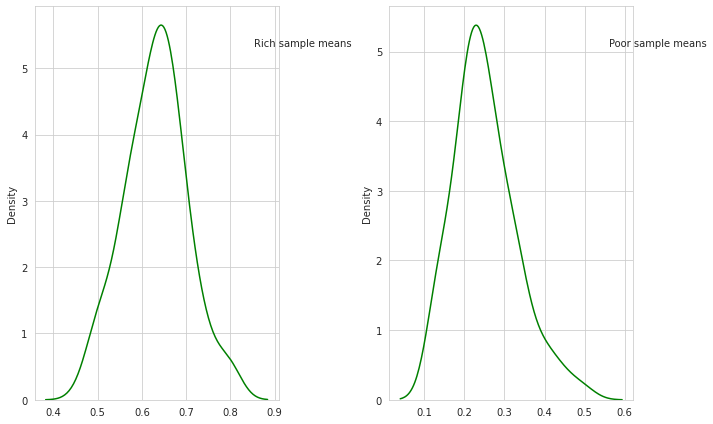

In [61]:
# plot histogram of sample means
f = plt.figure(figsize=(10,6))
f.add_subplot(1,2,1)
ax1=sns.kdeplot(first_sample,color='g')
f.add_subplot(1,2,2)
ax2=sns.kdeplot(third_sample,color='g')
ax1.annotate('Rich sample means',xy=(0.9, 0.9), xycoords="axes fraction")
ax2.annotate('Poor sample means',xy=(0.9, 0.9), xycoords="axes fraction")
plt.tight_layout()
plt.show()

In [62]:
np.mean(first_sample),np.mean(third_sample)

(0.6313333333333333, 0.2516666666666667)

According to the sample distributions, the effect of the class is 0.63–0.24 = 0.39



In [63]:
effect = np.mean(first_sample) - np.mean(third_sample) # z test
sigma_first = np.std(first_sample)
sigma_third = np.std(third_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(first_sample)  +  (sigma_third**2)/len(third_sample))
z_score = effect / sigma_difference
z_score

36.19266814809299

In [64]:
from scipy import stats # ttest
stats.ttest_ind(first_sample,third_sample)

Ttest_indResult(statistic=36.01125012272144, pvalue=7.403200230209857e-89)

The P-value is almost 0. This is definitely much smaller than the significance level of 0.05 that we set. That P-value means that if we assume that the null hypothesis is true, then the probability of observing that effect by random is 0% which is an extremely small probability that makes us comfortable in rejecting the Null hypothesis.

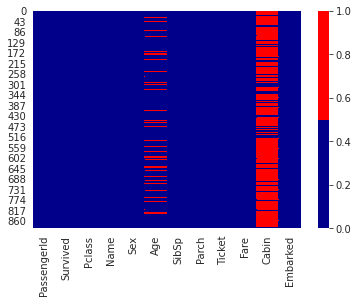

In [65]:
cols = Data.columns 
colours = ['darkblue', 'red'] 
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

It seems that the features “Age” and “Cabin” have a lot of missing values.

In [66]:
#Missing value in %
for col in cols:
  print("missing value % in",col, round(Data[col].isnull().sum()/len(Data),2)*100,'%')

missing value % in PassengerId 0.0 %
missing value % in Survived 0.0 %
missing value % in Pclass 0.0 %
missing value % in Name 0.0 %
missing value % in Sex 0.0 %
missing value % in Age 20.0 %
missing value % in SibSp 0.0 %
missing value % in Parch 0.0 %
missing value % in Ticket 0.0 %
missing value % in Fare 0.0 %
missing value % in Cabin 77.0 %
missing value % in Embarked 0.0 %


In [67]:
# drop The feature “Cabin” is missing 77% of the data. 
Data.drop('Cabin',axis=1,inplace=True)

The dataset has a feature “Name” the name has the title of the people (e.g. “Mr”, “Miss”…etc). That title should be a great indication of the age. Also, I should keep in mind that at that time of the incidence (in 1912) the socioeconomic status affected the people’s title regardless on age (e.g. younger people who are rich could get titles that usual poor people at the same age wouldn’t). we will group people by their title and Pclass and then I will assign the mean of the age of each group to the missing age in each group.

In [68]:
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
#extract title name 
def extract_title(col_value):
  
  title_value = col_value.split(",")[1].split(".")[0]
  return title_value
Data['Title'] = Data['Name'].apply(extract_title)

In [70]:
Data.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [71]:
age_impute = Data.groupby(['Title','Pclass'])['Age'].mean().round(0)
age_impute

Title          Pclass
 Capt          1         70.0
 Col           1         58.0
 Don           1         40.0
 Dr            1         44.0
               2         38.0
 Jonkheer      1         38.0
 Lady          1         48.0
 Major         1         48.0
 Master        1          5.0
               2          2.0
               3          5.0
 Miss          1         30.0
               2         22.0
               3         16.0
 Mlle          1         24.0
 Mme           1         24.0
 Mr            1         42.0
               2         33.0
               3         29.0
 Mrs           1         41.0
               2         34.0
               3         34.0
 Ms            2         28.0
 Rev           2         43.0
 Sir           1         49.0
 the Countess  1         33.0
Name: Age, dtype: float64

In [72]:
# adding the mean of the age of each group to the missing values
Data["Age"] = Data.groupby(["Title", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [73]:
Data = Data.drop(columns = ["Name"])
Data = Data.drop(columns = ["PassengerId"])
Data = Data.drop(columns = ["Ticket"])

In [76]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,Mr
1,1,1,0,38.0,1,0,71.2833,0,Mrs
2,1,3,0,26.0,0,0,7.9250,2,Miss
3,1,1,0,35.0,1,0,53.1000,2,Mrs
4,0,3,1,35.0,0,0,8.0500,2,Mr


In [74]:
Data.Sex = pd.Categorical(Data.Sex)
Data.Embarked = pd.Categorical(Data.Embarked)
Data["Sex"] = Data.Sex.cat.codes
Data["Embarked"] = Data.Embarked.cat.codes #encode the categorical features into numerical

In [77]:
target = Data.Survived.values
Data = Data.drop(columns =["Survived",'Title'])

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Data, target, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR.score(x_test, y_test)

0.8156424581005587

#### Model Interpretation with SHAP

In [79]:
!pip install SHAP

     |████████████████████████████████| 358kB 3.9MB/s 
  Created wheel for SHAP: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=8769cd7fec0ae5b75788b851645ff080c4bff13b289a2eba7fa2bcf4bed48e86
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built SHAP


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


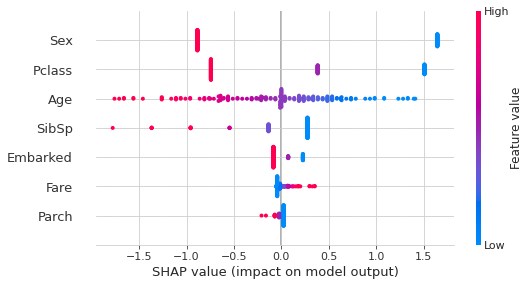

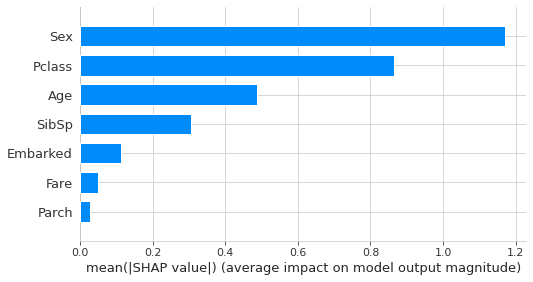

In [80]:
import shap
explainer = shap.LinearExplainer(LR, x_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)
shap.summary_plot(shap_values, x_train, plot_type="bar")

As expected from the statistical inference that I conducted, the Pclass has a significant effect on the survival rate of the passengers. It’s the second most significant feature after “Sex”. We see from the plot above that low values (blue) for Pclass which correspond to a class of 1 (richer people) have a positive effect on people’s survival while higher values (red), which correspond to the third class, have a negative effect on the survival rate. We can also see that “sex” is the most important feature with an indication that being a “female” (blue) had a positive impact on the survival rate. The feature “Age” also shows that lower values (blue) had a positive impact on survival.

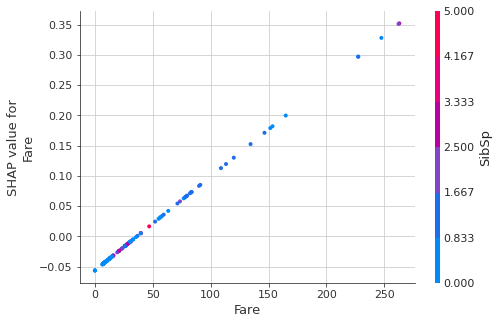

In [82]:
shap.dependence_plot("Fare", shap_values, x_test)
#here is a linear relationship between how much people paid and their chance of survival. The richer they were the more likely they survived.